<a href="https://colab.research.google.com/github/Yael313255748/LinearRegression/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Definición de variables**

In [50]:
#Variable independiente
x=np.arange(-1,1,0.001).reshape(-1,1)
poly=PolynomialFeatures(degree=3)
X=poly.fit_transform(x)
k=X.shape[1]
#Coeficientes
coef=np.random.normal(size=(k,1))
#Variable dependiente
y=X.dot(coef)+np.random.normal(scale=0.1,size=(len(x),1))

 **Gráfico de Variables**

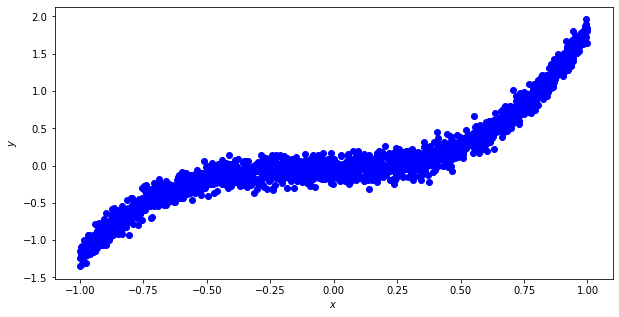

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,c='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

**Definición de los conjuntos de entrenamiento y prueba**

In [52]:
s=round(X.shape[0]*0.8)
X_train=X[:s,:]
X_test=X[s:,:]
y_train=y[:s]
y_test=y[s:]

**Ajuste del Modelo**

In [53]:
lm=OLS(y_train,X_train).fit()

In [54]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.921     
Dependent Variable: y                AIC:                -2866.4938
Date:               2022-04-15 20:32 BIC:                -2844.9828
No. Observations:   1600             Log-Likelihood:     1437.2    
Df Model:           3                F-statistic:        6240.     
Df Residuals:       1596             Prob (F-statistic): 0.00      
R-squared:          0.921            Scale:              0.0097359 
---------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const      -0.0533     0.0041   -12.9032   0.0000   -0.0614   -0.0452
x1          0.0730     0.0112     6.5028   0.0000    0.0509    0.0950
x2          0.3632     0.0231    15.7075   0.0000    0.3178    0.4085
x3          1.4457     0.0319    45.3669   0.0000    1.3832    1.5082
-------------------------------------------------------------------
Omnibus:                0.913        Durbin-Watson:           2.127
Prob(Omnibus):          0.633        Jarque-Bera (JB):        0.956
Skew:                   0.004        Prob(JB):                0.620
Kurtosis:               2.880        Condition No.:           17   
===================================================================

"""

**Predicción**

In [57]:
ypred=lm.predict(X)

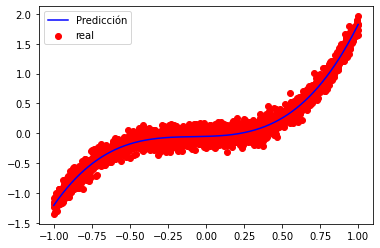

In [59]:
plt.scatter(X[:,1],y,c='red',label='real')
plt.plot(X[:,1],ypred,c='blue',label='Predicción')
plt.legend()
plt.show()